In [3]:
%matplotlib inline
import os
import re

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

/lfs1/home/jackyu/anaconda3/envs/work/lib/python3.4/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


<module 'climatools.scripts.g1_threshold' from '/lfs1/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [43]:
# for printing some input parameters

def innames():
    return ['vstar', 'nband', 'nv', 'dv',
            'tsfc',
            'pressure_reference_1',
            'temperature_reference_1', 
            'pressure_reference_2', 
            'temperature_reference_2',
            'ighigh', 
            'ng', 
            'nref',
            'p_refs',
            't_refs',
            'ng_refs',
            'absth',
            'wgt',
            'planck_wgt_flux']


def pattern_assign(name):
    return ''' 
    parameter .* :: \s* &? \s* ({} \s* = .* \n)
    '''.format(name)

def pattern_data(name):
    return '''
    (data [^/{name}]+ {name}[^,] [^/{name}]+ / [^/]+ /)
    '''.format(name=name)

def pattern_atmpro():
    return '''
    (include \s+ '.*\.pro')
    '''


def get_input_params(code, names):
    results = []
    for name in names:
        regex = re.compile(pattern_assign(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
        regex = re.compile(pattern_data(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
    regex = re.compile(pattern_atmpro(), re.VERBOSE)
    results.extend(regex.findall(code))
        
    results = [result.replace('_r8', '') for result in results]
    return results


In [5]:
analysis = scripts.Analysis()

In [6]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/lfs1/home/jackyu/radiation/crd/LW',
                          'examples/separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band02_wn_340_540',
                          'ng_8',
                          'g_descending',
                          'refPTs_P_1_T_250__P_10_T_250__P_500_T_250',
                          'ng_refs_2_2_4',
                          'getabsth_auto__auto__auto',
                          'absth_dlogN_uniform__dlogN_uniform__dlogN_uniform',
                          'wgt_all.5__all.5__all0',
                          'bigsum',
                          'atmpro_mls')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [7]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/lfs1/home/jackyu/radiation/crd/LW',
                          'examples/separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band02_wn_340_540',
                          'ng_8',
                          'g_descending',
                          'refPTs_P_1_T_250__P_10_T_250__P_500_T_250',
                          'ng_refs_2_2_4',
                          'getabsth_auto__auto__auto',
                          'absth_dlogN_uniform__dlogN_uniform__dlogN_uniform',
                          'wgt_all.5__all.5__all0',
                          'bigsum',
                          'atmpro_mls')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [36]:
fig = analysis.fig_fluxcoolr('fig1')
fig.ggroups = list(range(1, 8 + 1))
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-4, 50)

In [37]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [38]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [39]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [44]:
# print some input parameters

with open(os.path.join(crd.rundir, 'lblnew.f'), 
          mode='r', encoding='utf-8') as f:
    c = f.read()

print('\n\n'.join(get_input_params(c, innames())))

vstar = 340

nband = 200

nv = 200

dv = 0.005

tsfc = 294.0

ng = 8

nref = 3

p_refs = (/ 1,  10, 500 /)

t_refs = (/ 250, 250, 250 /)

ng_refs = (/ 2,   2,   4 /)

data wgt
     &     /4*0, 4*.5/

planck_wgt_flux = 2

include 'mls75.pro'


In [41]:
fig.display_hrefanchor()

In [42]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()
table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [43]:
table_dgdgs.display_hrefanchor()

In [44]:
s_abscom = 'Overall absth'
display.HTML(climahtml.getHTML_hrefanchor(s_abscom))

In [45]:
s_ggroup_summary = 'g-group summary'
display.HTML(climahtml.getHTML_hrefanchor(s_ggroup_summary))

In [46]:
#for g in range(1, 20 + 1):
#    s = 'Table: cooling rate. g-group {}'.format(g)
#    html = climahtml.getHTML_hrefanchor(s)
#    display.display(display.HTML(html))

# Figure: flux, cooling rate g-group 1

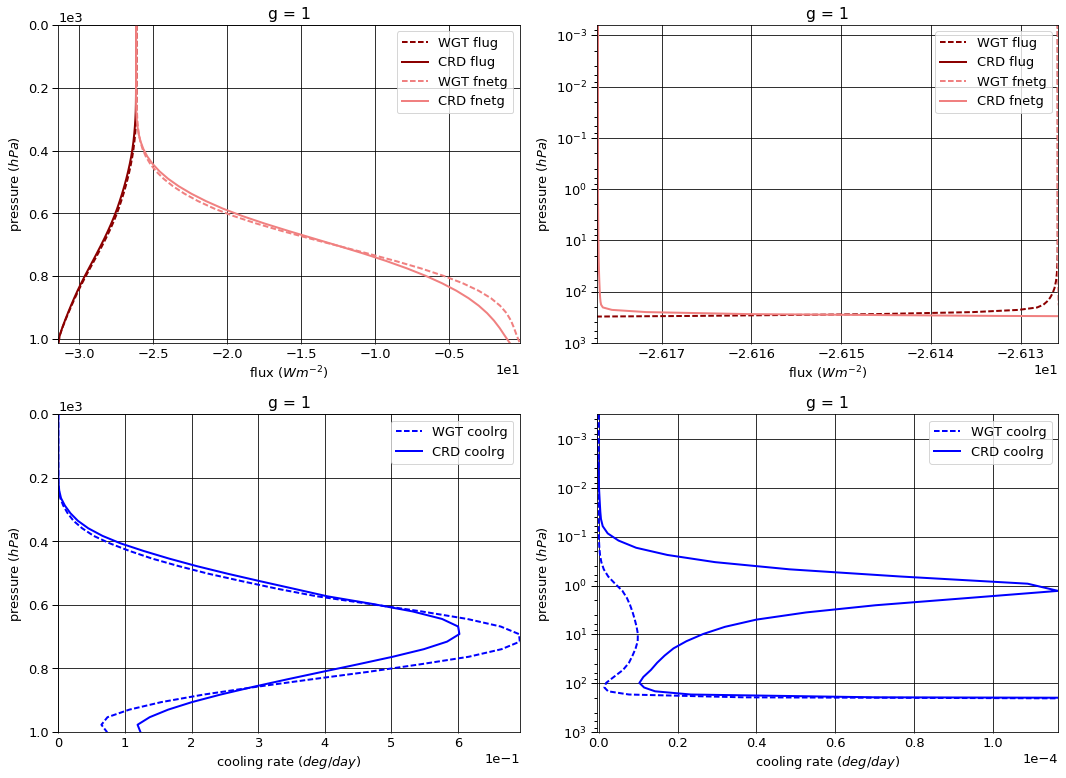

# Figure: flux, cooling rate g-group 2

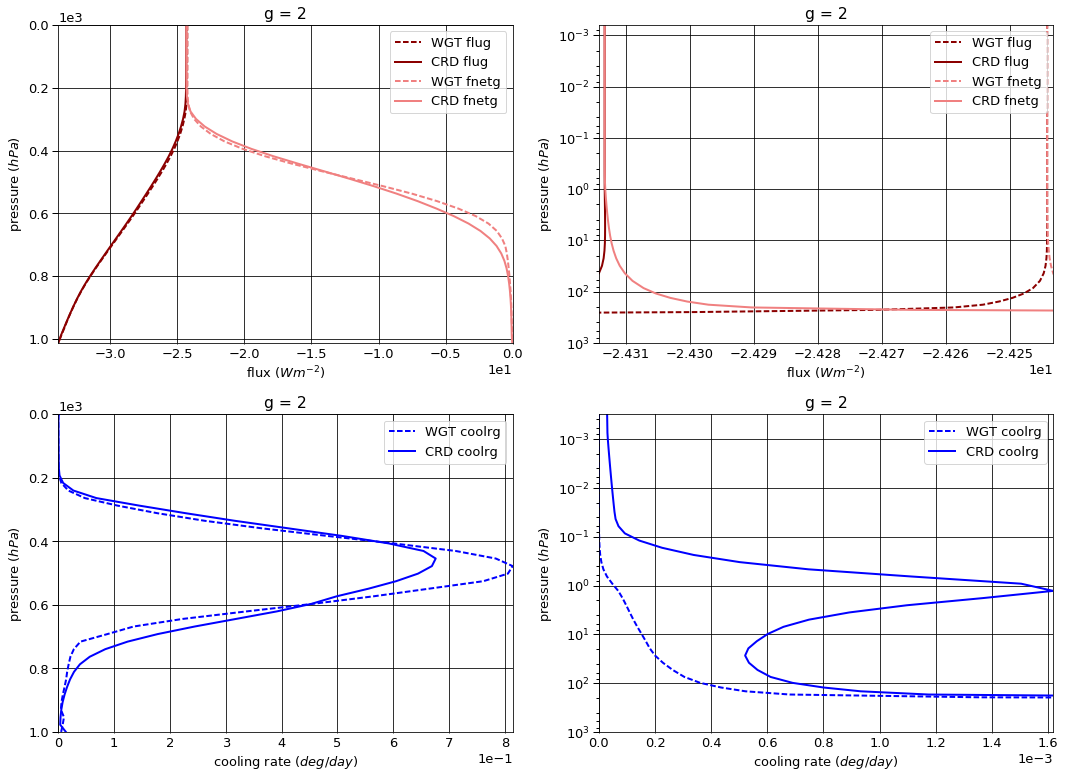

# Figure: flux, cooling rate g-group 3

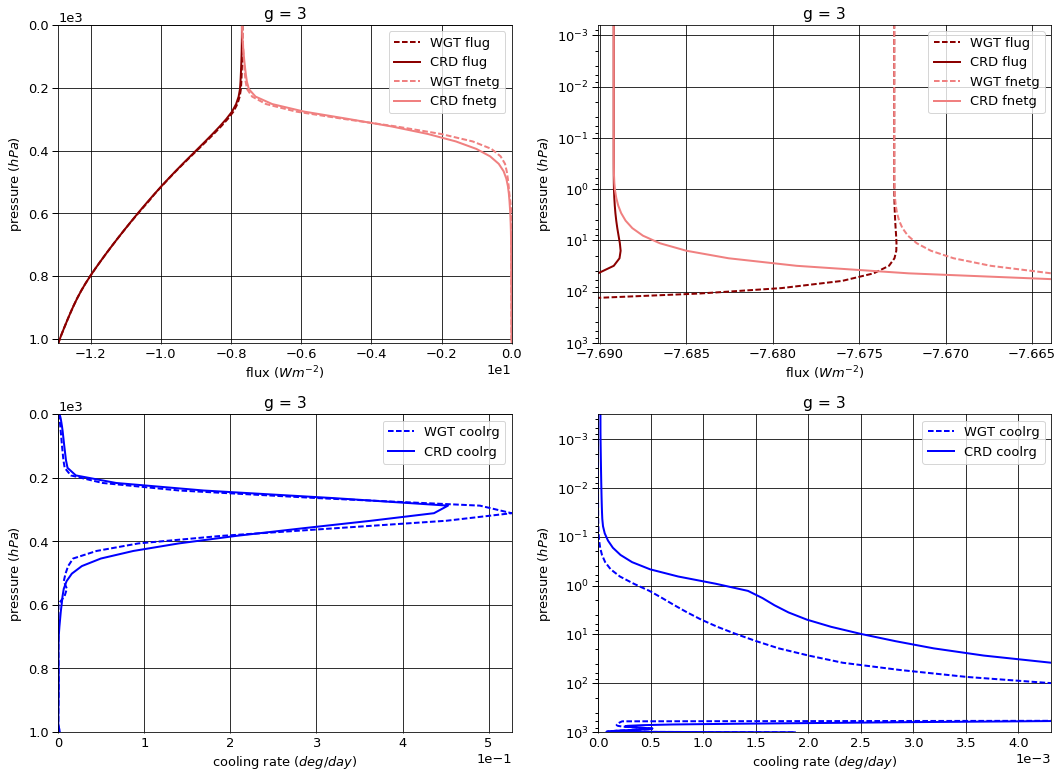

# Figure: flux, cooling rate g-group 4

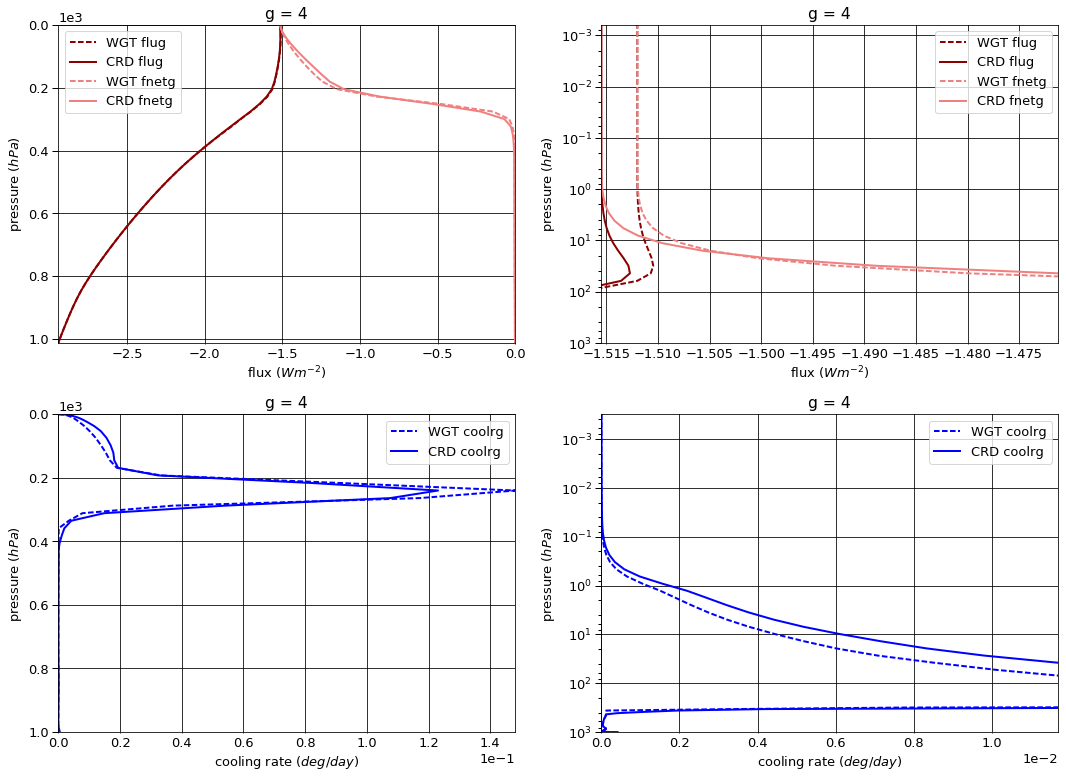

# Figure: flux, cooling rate g-group 5

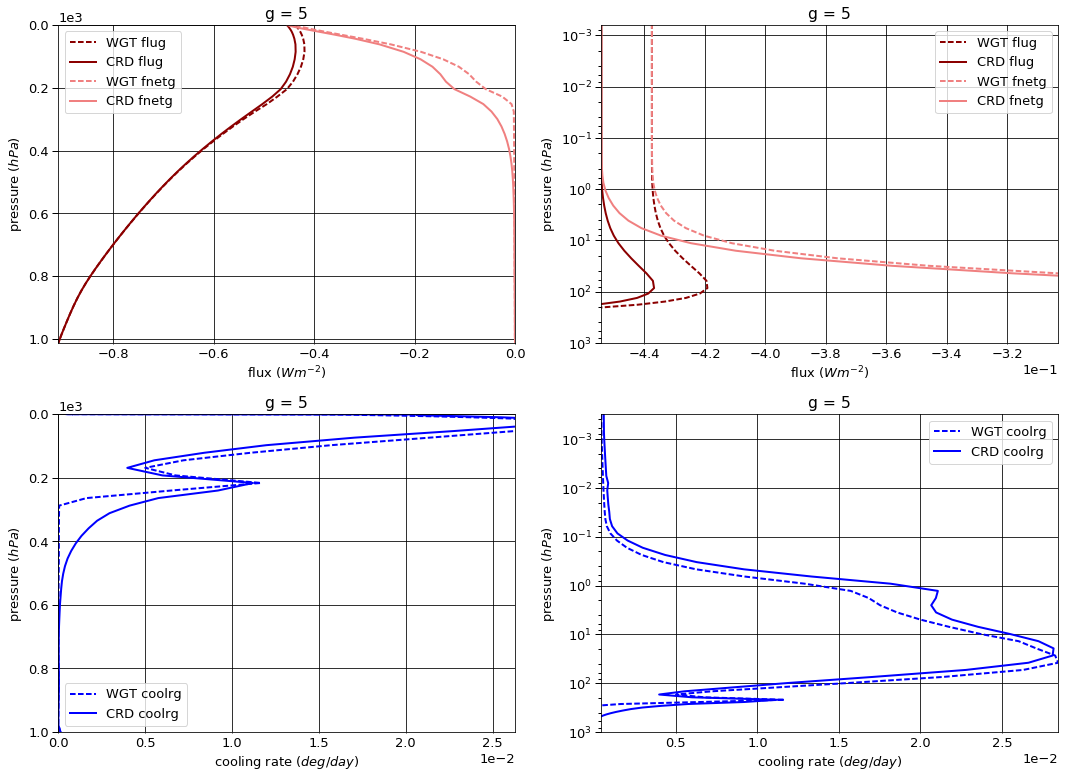

# Figure: flux, cooling rate g-group 6

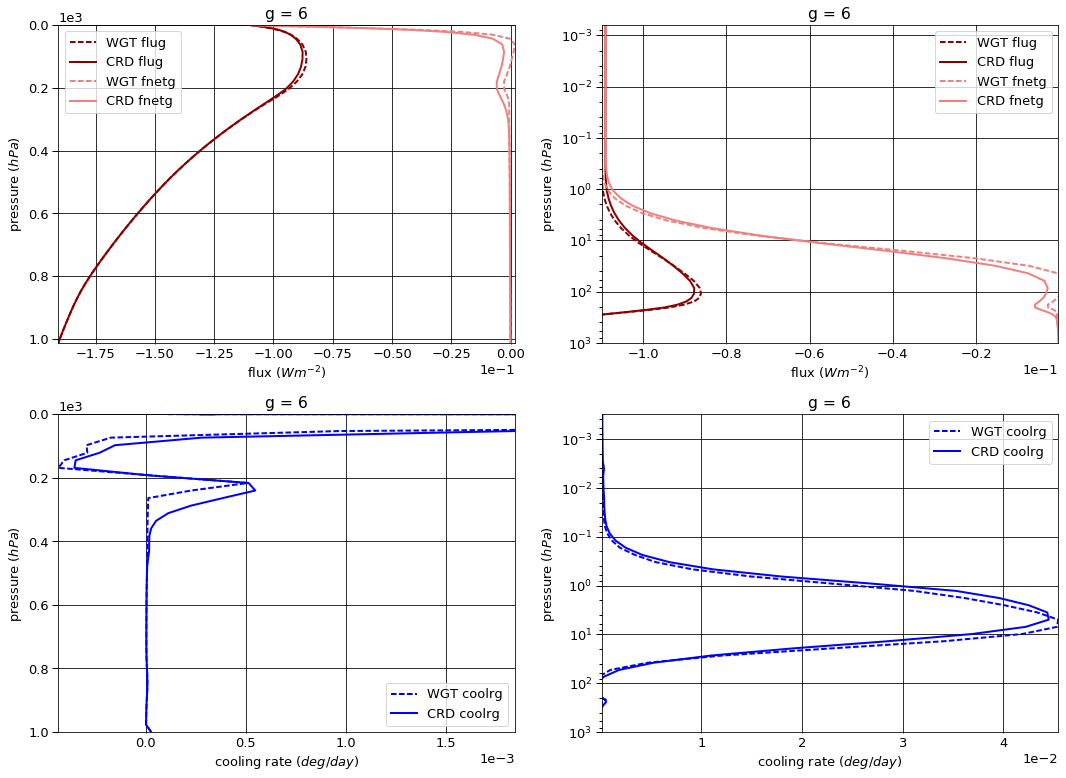

# Figure: flux, cooling rate g-group 7

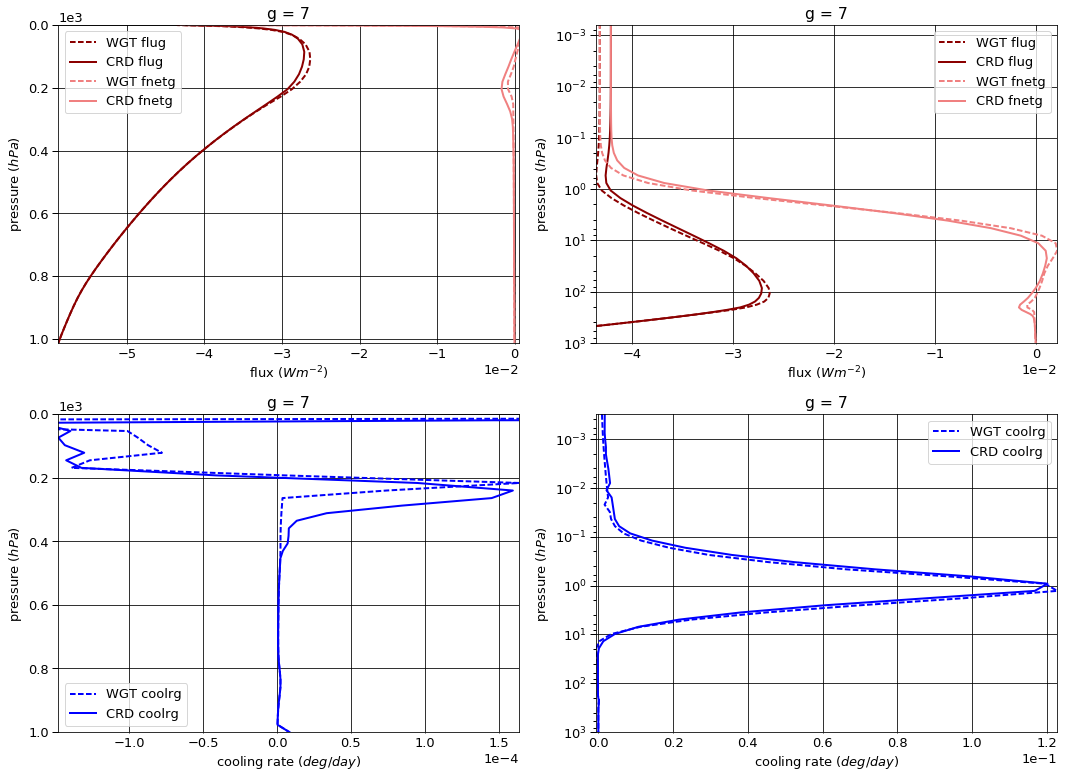

# Figure: flux, cooling rate g-group 8

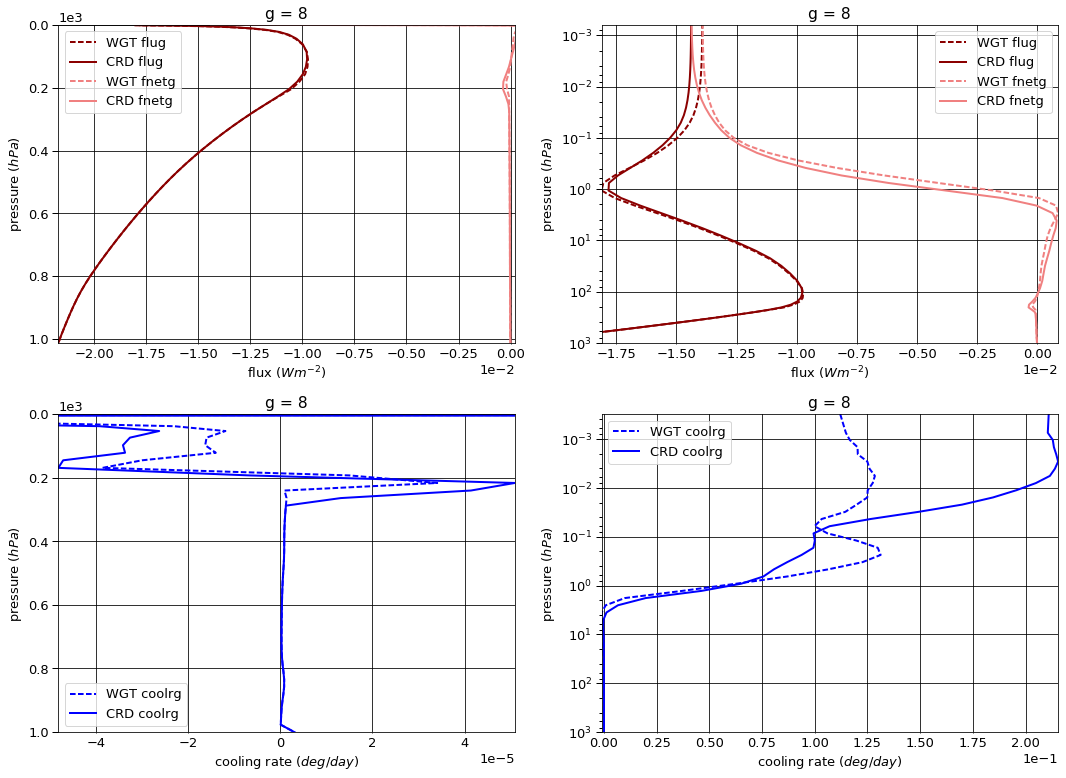

# Figure: flux, cooling rate g-group total

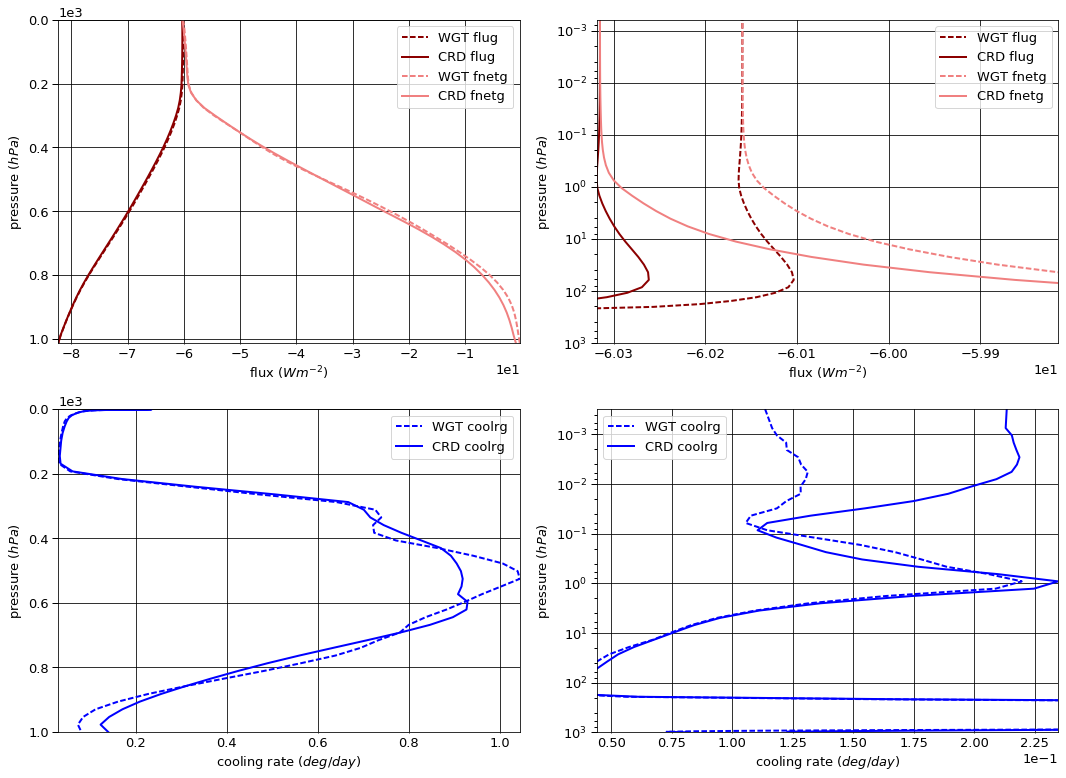

In [47]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [48]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug       fldg      fnetg
g pressure level                                 
1 0.0      1     -26.177122   0.000000 -26.177122
  1013.0   76    -31.429589  30.513498  -0.916091
2 0.0      1     -24.313266   0.000000 -24.313266
  1013.0   76    -33.844170  33.806636  -0.037534
3 0.0      1      -7.689197   0.000000  -7.689197
  1013.0   76    -12.919095  12.913911  -0.005185
4 0.0      1      -1.515482   0.000000  -1.515482
  1013.0   76     -2.942820   2.941653  -0.001167
5 0.0      1      -0.454260   0.000000  -0.454260
  1013.0   76     -0.908871   0.908497  -0.000374
6 0.0      1      -0.109033   0.000000  -0.109033
  1013.0   76     -0.190690   0.190613  -0.000076
7 0.0      1      -0.042074   0.000000  -0.042074
  1013.0   76     -0.058846   0.058822  -0.000024
8 0.0      1      -0.014380   0.000000  -0.014380
  1013.0   76     -0.021715   0.021706  -0.000009


WGT


flug       fldg      fnetg
g pressure level                                 
1 0.0      1     -26.125864   0.000000 -26.125864
  1013.0   76    -31.429589  31.189402  -0.240187
2 0.0      1     -24.244131   0.000000 -24.244131
  1013.0   76    -33.844170  33.830011  -0.014159
3 0.0      1      -7.672971   0.000000  -7.672971
  1013.0   76    -12.919095  12.913911  -0.005185
4 0.0      1      -1.512000   0.000000  -1.512000
  1013.0   76     -2.942820   2.941653  -0.001167
5 0.0      1      -0.437547   0.000000  -0.437547
  1013.0   76     -0.908871   0.908507  -0.000364
6 0.0      1      -0.109955   0.000000  -0.109955
  1013.0   76     -0.190690   0.190613  -0.000076
7 0.0      1      -0.043172   0.000000  -0.043172
  1013.0   76     -0.058846   0.058822  -0.000024
8 0.0      1      -0.013914   0.000000  -0.013914
  1013.0   76     -0.021715   0.021706  -0.000009


WGT - CRD


flug      fldg     fnetg
g pressure level                              
1 0.0      1      0.051258  0.000000  0.051258
  1013.0   76     0.000000  0.675904  0.675904
2 0.0      1      0.069135  0.000000  0.069135
  1013.0   76     0.000000  0.023375  0.023375
3 0.0      1      0.016225  0.000000  0.016225
  1013.0   76     0.000000  0.000000  0.000000
4 0.0      1      0.003482  0.000000  0.003482
  1013.0   76     0.000000  0.000000  0.000000
5 0.0      1      0.016713  0.000000  0.016713
  1013.0   76     0.000000  0.000010  0.000010
6 0.0      1     -0.000921  0.000000 -0.000921
  1013.0   76     0.000000  0.000000  0.000000
7 0.0      1     -0.001099  0.000000 -0.001099
  1013.0   76     0.000000  0.000000  0.000000
8 0.0      1      0.000466  0.000000  0.000466
  1013.0   76     0.000000  0.000000  0.000000

# Table: cooling rate. g-groups 


CRD


coolrg
g pressure    layer              
1 0.000312    1     -5.383975e-07
  1001.112500 75     1.234334e-01
2 0.000312    1      2.927117e-05
  1001.112500 75     1.429451e-02
3 0.000312    1      2.362078e-05
  1001.112500 75     1.872963e-03
4 0.000312    1      4.162103e-06
  1001.112500 75     4.215713e-04
5 0.000312    1      5.759593e-04
  1001.112500 75     1.352535e-04
6 0.000312    1      1.841472e-04
  1001.112500 75     2.760472e-05
7 0.000312    1      1.716427e-03
  1001.112500 75     8.593242e-06
8 0.000312    1      2.109479e-01
  1001.112500 75     3.162839e-06


WGT


coolrg
g pressure    layer              
1 0.000312    1     -9.606521e-11
  1001.112500 75     7.334204e-02
2 0.000312    1      7.685217e-10
  1001.112500 75     5.113937e-03
3 0.000312    1      1.074730e-08
  1001.112500 75     1.872963e-03
4 0.000312    1      4.462830e-08
  1001.112500 75     4.215713e-04
5 0.000312    1      4.295591e-04
  1001.112500 75     1.315415e-04
6 0.000312    1      1.106918e-04
  1001.112500 75     2.760472e-05
7 0.000312    1      9.712055e-04
  1001.112500 75     8.593242e-06
8 0.000312    1      1.120798e-01
  1001.112500 75     3.162839e-06


WGT - CRD


coolrg
g pressure    layer              
1 0.000312    1      5.383014e-07
  1001.112500 75    -5.009140e-02
2 0.000312    1     -2.927040e-05
  1001.112500 75    -9.180568e-03
3 0.000312    1     -2.361003e-05
  1001.112500 75     0.000000e+00
4 0.000312    1     -4.117475e-06
  1001.112500 75     0.000000e+00
5 0.000312    1     -1.464002e-04
  1001.112500 75    -3.712050e-06
6 0.000312    1     -7.345536e-05
  1001.112500 75     0.000000e+00
7 0.000312    1     -7.452219e-04
  1001.112500 75     0.000000e+00
8 0.000312    1     -9.886801e-02
  1001.112500 75     0.000000e+00

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-60.314813,0.000000,-60.314813
1013.0,76,-82.315794,81.355336,-0.960459



WGT


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-60.159554,0.000000,-60.159554
1013.0,76,-82.315794,82.054624,-0.261171



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,0.155259,0.000000,0.155259
1013.0,76,0.000000,0.699289,0.699288


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,0.213481
1001.112500,75,0.140197



WGT


,,coolrg
pressure,layer,
0.000312,1,0.113591
1001.112500,75,0.080921



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,-0.099890
1001.112500,75,-0.059276


In [49]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.363475,0.372178
2,0.417450,0.414964
3,0.165800,0.161220
4,0.038125,0.036905
5,0.011675,0.011350
6,0.002450,0.002381
7,0.000750,0.000732
8,0.000275,0.000270


In [50]:
# read and display overall absth
display.display(
    display.HTML(climahtml.getHTML_idanchor(s_abscom)))
display.display(
    display.Markdown(climahtml.getMarkdown_sectitle(s_abscom)))

display.display(pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'),
                sep=r'\s+',
                index_col=[0]))

# Overall absth

,abscom
g,
1,0.000000e+00
2,6.363853e-23
3,1.017863e-21
4,1.628015e-20
5,5.884150e-21
6,9.703791e-20
7,1.817172e-19
8,3.060940e-18


In [56]:
def spreadsheet():
    ng = 8
    ng_refs = [2, 2, 4]
    p_refs = [1, 10, 500]
    
    df_abscom = pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'), 
                            sep=r'\s+', index_col=[0])
    
    # absth(g + 1) / absth(g)
    df_abscom_copy = df_abscom.copy()
    df_abscom_copy.index = df_abscom.index + 1
    df_absratio = df_abscom.loc[3:ng] / df_abscom_copy.loc[3:ng]
    df_absratio.columns = ['k(ig+1)/k(ig)']

    df_dgdgs = crd.data['dgdgs'].to_dataframe()
    
    
    df_dgdgs_cumsum = df_dgdgs.cumsum(axis=0)
    df_dgdgs_cumsum.columns = ['dg cumsum', 'dgs cumsum']
    
    data_pref = np.concatenate([p_ref * np.ones((ng_ref,)) 
                                for ng_ref, p_ref 
                                in zip(ng_refs, p_refs)], axis=0)
    df_pref = pd.DataFrame(data_pref[::-1], 
                           index=df_dgdgs.index, columns=['pref'])
    
    df_all = pd.concat([df_abscom, df_absratio,
                        df_dgdgs, df_dgdgs_cumsum,
                        df_pref], axis=1) 
    return df_all
    

In [57]:
display.display(display.HTML(climahtml.getHTML_idanchor(s_ggroup_summary)))
display.display(display.Markdown(climahtml.getMarkdown_sectitle(s_ggroup_summary)))
display.display(spreadsheet())

# g-group summary

,abscom,k(ig+1)/k(ig),dg,dgs,dg cumsum,dgs cumsum,pref
g,,,,,,,
1,0.000000e+00,NaN,0.363475,0.372178,0.363475,0.372178,500.0
2,6.363853e-23,NaN,0.417450,0.414964,0.780925,0.787142,500.0
3,1.017863e-21,15.994442,0.165800,0.161220,0.946725,0.948362,500.0
4,1.628015e-20,15.994441,0.038125,0.036905,0.984850,0.985267,500.0
5,5.884150e-21,0.361431,0.011675,0.011350,0.996525,0.996616,10.0
6,9.703791e-20,16.491408,0.002450,0.002381,0.998975,0.998998,10.0
7,1.817172e-19,1.872642,0.000750,0.000732,0.999725,0.999730,1.0
8,3.060940e-18,16.844524,0.000275,0.000270,1.000000,1.000000,1.0


In [45]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')